<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/SIFTDescriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple d'utilisation de SIFT

In [7]:
!pip install opencv-python==4.5.5.64 #il faut une version récente pour SIFT > 4.4
import cv2  
import os
import matplotlib.pyplot as plt
cv2.__version__

'4.5.5'

Lecture de deux images tests et affichage.

In [8]:
image_name = 'in000235.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000235.jpg
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in000240.jpg

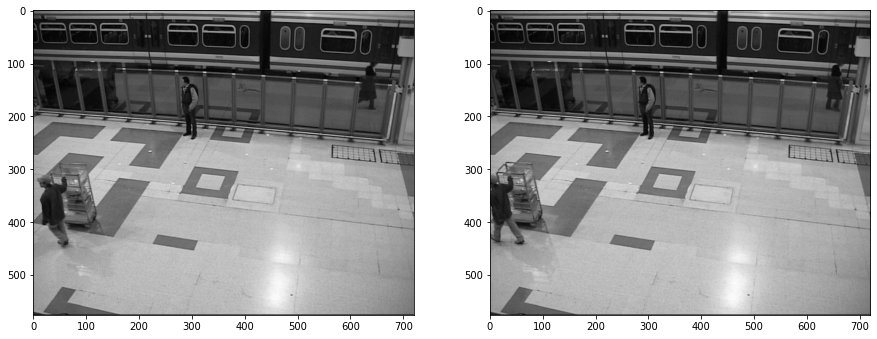

In [9]:
image1 = cv2.imread('in000235.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('in000240.jpg',cv2.IMREAD_GRAYSCALE) 

f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Extraction des points clefs sur les images. Certains points clefs ont deux orientations.

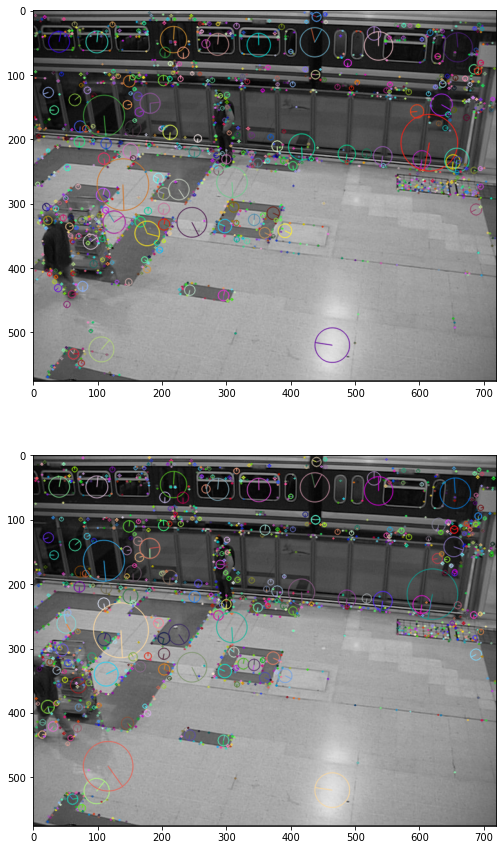

In [10]:
sift = cv2.SIFT_create()
pointsclefs1 = sift.detect(image1,None)
pointsclefs2 = sift.detect(image2,None)

#Le cercle représente l'échelle, et la ligne l'angle.
imageout1 = cv2.drawKeypoints(image1,pointsclefs1,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageout2 = cv2.drawKeypoints(image2,pointsclefs2,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

f, axarr = plt.subplots(2, 1, figsize=(15,15))
axarr[0].imshow(imageout1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(imageout2,cmap = plt.get_cmap('gray'))
plt.show()

Description des points clefs.

In [11]:
_, descripteurs1 = sift.compute(image1,pointsclefs1)
_, descripteurs2 = sift.compute(image2,pointsclefs2)

Mise en correspondance des points.

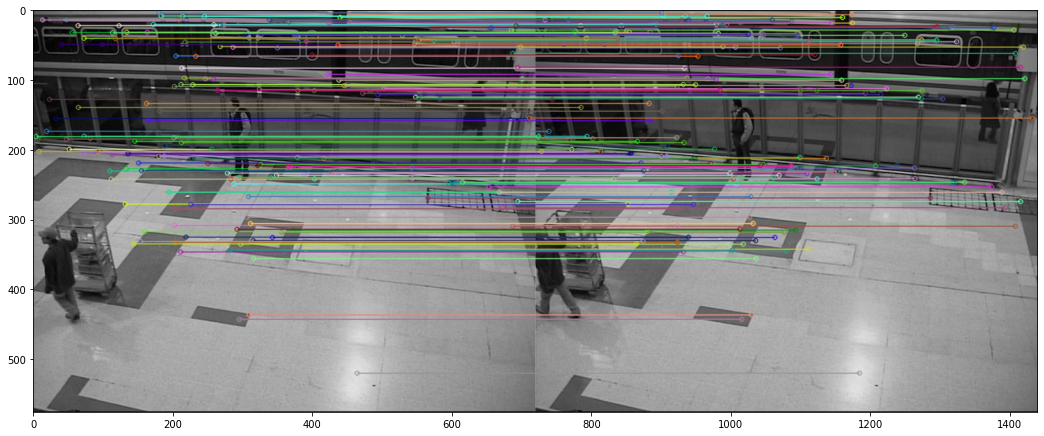

In [12]:
bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=True)
correspondances = bf.match(descripteurs1,descripteurs2)
correspondances = sorted(correspondances, key = lambda x:x.distance) #On affichera seulement quelques correspondances
plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(image1,pointsclefs1,image2,pointsclefs2,correspondances[0:200], None, flags = 2)
plt.imshow(imageout3)
plt.show()